In [1]:
# Importar librerías y cargar datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar solo las columnas necesarias para reducir el uso de memoria
df = pd.read_csv(
    'data\Loan_status_2007-2020Q3.gzip',
    usecols=['dti', 'annual_inc', 'home_ownership', 'fico_range_low', 'delinq_2yrs', 'pub_rec', 'inq_last_6mths', 'revol_util', 'revol_bal', 'total_acc', 'term', 'loan_amnt', 'loan_status', 'int_rate', 'issue_d'],
    low_memory=False
)

# Mostrar tamaño inicial del DataFrame
print(f"Tamaño del DataFrame al importar: {df.shape}")

# Mostrar las primeras filas para verificar la carga
print(df.head())


Tamaño del DataFrame al importar: (2925493, 15)
   loan_amnt        term int_rate home_ownership  annual_inc   issue_d  \
0     5000.0   36 months   10.65%           RENT     24000.0  Dec-2011   
1     2500.0   60 months   15.27%           RENT     30000.0  Dec-2011   
2     2400.0   36 months   15.96%           RENT     12252.0  Dec-2011   
3    10000.0   36 months   13.49%           RENT     49200.0  Dec-2011   
4     3000.0   60 months   12.69%           RENT     80000.0  Dec-2011   

   loan_status    dti  delinq_2yrs  fico_range_low  inq_last_6mths  pub_rec  \
0   Fully Paid  27.65          0.0           735.0             1.0      0.0   
1  Charged Off   1.00          0.0           740.0             5.0      0.0   
2   Fully Paid   8.72          0.0           735.0             2.0      0.0   
3   Fully Paid  20.00          0.0           690.0             1.0      0.0   
4   Fully Paid  17.94          0.0           695.0             0.0      0.0   

   revol_bal revol_util  total_a

In [2]:
# Filtrado de datos por rango de fechas (2015-2019)
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Definir rango de fechas
fecha_inicio = '2015-01-01'
fecha_fin = '2019-12-31'

# Filtrar el DataFrame por el rango de fechas
df = df[(df['issue_d'] >= fecha_inicio) & (df['issue_d'] <= fecha_fin)].copy()

# Ordenar por fecha y eliminar la columna 'issue_d'
df = df.sort_values('issue_d')

# Eliminar la columna 'issue_d' después del filtrado
df = df.drop(columns=['issue_d'])

# Mostrar tamaño del DataFrame después del filtrado por fecha
print(f"Tamaño del DataFrame después del filtrado por fecha: {df.shape}")


# Filtrado de filas con valores nulos
df = df.dropna()
print(f"Tamaño del DataFrame después de eliminar nulos: {df.shape}")


# Filtrado de filas con valores no válidos en 'loan_status'
df = df[df['loan_status'] != 'Current'].copy()
print(f"Tamaño del DataFrame después del filtrado de 'Current': {df.shape}")


# Filtrado de filas con valores no válidos en 'home_ownership'
df = df[df['home_ownership'].isin(['RENT', 'OWN'])].copy()
print(f"Tamaño del DataFrame después del filtrado de 'home_ownership': {df.shape}")

# Mostrar las primeras filas para verificar los cambios
print(df.head())

Tamaño del DataFrame después del filtrado por fecha: (2312430, 14)
Tamaño del DataFrame después de eliminar nulos: (2307446, 14)
Tamaño del DataFrame después del filtrado de 'Current': (1418242, 14)
Tamaño del DataFrame después del filtrado de 'home_ownership': (724665, 14)
         loan_amnt        term int_rate home_ownership  annual_inc  \
2265351    14700.0   60 months   19.99%            OWN     67000.0   
2265349    11200.0   60 months   20.99%           RENT     34714.8   
2265350     7200.0   36 months   13.66%           RENT     32000.0   
2265356    10850.0   60 months   19.99%           RENT     35000.0   
2265358    15000.0   36 months   11.99%            OWN     46000.0   

         loan_status    dti  delinq_2yrs  fico_range_low  inq_last_6mths  \
2265351   Fully Paid  38.15          8.0           665.0             1.0   
2265349  Charged Off  25.38          0.0           660.0             1.0   
2265350   Fully Paid  11.52          0.0           700.0             0.0   


In [3]:
# Conversión de tipos de datos

# Convertir 'int_rate' de porcentaje a decimal
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100.0

# Convertir 'revol_util' de porcentaje a decimal
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float) / 100.0

# Convertir 'term' de cadena a entero
df['term'] = df['term'].str.strip().str.rstrip(' months').astype(int)

# Mostrar tipos de datos después de la conversión
print (df.head())

         loan_amnt  term  int_rate home_ownership  annual_inc  loan_status  \
2265351    14700.0    60    0.1999            OWN     67000.0   Fully Paid   
2265349    11200.0    60    0.2099           RENT     34714.8  Charged Off   
2265350     7200.0    36    0.1366           RENT     32000.0   Fully Paid   
2265356    10850.0    60    0.1999           RENT     35000.0  Charged Off   
2265358    15000.0    36    0.1199            OWN     46000.0   Fully Paid   

           dti  delinq_2yrs  fico_range_low  inq_last_6mths  pub_rec  \
2265351  38.15          8.0           665.0             1.0      0.0   
2265349  25.38          0.0           660.0             1.0      0.0   
2265350  11.52          0.0           700.0             0.0      0.0   
2265356  26.41          0.0           675.0             0.0      0.0   
2265358   8.48          0.0           695.0             1.0      0.0   

         revol_bal  revol_util  total_acc  
2265351    30079.0       0.569       37.0  
2265349   

In [4]:
# Creación de columnas binarias
# Columna objetivo 'is_default': 1 si el préstamo está en default, 0 si está completamente pagado
df['is_default'] = df['loan_status'].apply(lambda x: 0 if x=="Fully Paid" else 1)
df = df.drop(columns=['loan_status'])

# Columna 'home_ownership': 1 si es 'OWN', 0 si es 'RENT'
df['home_ownership'] = df['home_ownership'].apply(lambda x: 1 if x == 'OWN' else 0)


# Mostrar las primeras filas para verificar los cambios finales
print(df.head())

         loan_amnt  term  int_rate  home_ownership  annual_inc    dti  \
2265351    14700.0    60    0.1999               1     67000.0  38.15   
2265349    11200.0    60    0.2099               0     34714.8  25.38   
2265350     7200.0    36    0.1366               0     32000.0  11.52   
2265356    10850.0    60    0.1999               0     35000.0  26.41   
2265358    15000.0    36    0.1199               1     46000.0   8.48   

         delinq_2yrs  fico_range_low  inq_last_6mths  pub_rec  revol_bal  \
2265351          8.0           665.0             1.0      0.0    30079.0   
2265349          0.0           660.0             1.0      0.0    14486.0   
2265350          0.0           700.0             0.0      0.0     4567.0   
2265356          0.0           675.0             0.0      0.0    20298.0   
2265358          0.0           695.0             1.0      0.0    10550.0   

         revol_util  total_acc  is_default  
2265351       0.569       37.0           0  
2265349       

In [5]:
# Mostrar estadísticas descriptivas finales
df.describe()


,loan_amnt,term,int_rate,home_ownership,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,is_default
count,724665.000000,724665.000000,724665.000000,724665.000000,7.246650e+05,724665.000000,724665.000000,724665.000000,724665.000000,724665.000000,7.246650e+05,724665.000000,724665.000000,724665.000000
mean,13221.210835,40.918400,0.133477,0.230273,6.898757e+04,18.695897,0.285234,695.260203,0.546157,0.225057,1.297373e+04,0.476847,21.983984,0.249622
std,8549.845862,9.687676,0.049411,0.421008,1.476981e+05,12.898418,0.863814,31.707217,0.833878,0.612923,1.685677e+04,0.248938,11.802439,0.432794
min,1000.000000,36.000000,0.053100,0.000000,1.500000e+01,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,6600.000000,36.000000,0.099200,0.000000,4.000000e+04,11.710000,0.000000,670.000000,0.000000,0.000000,4.873000e+03,0.285000,13.000000,0.000000
50%,11000.000000,36.000000,0.126900,0.000000,5.800000e+04,17.860000,0.000000,685.000000,0.000000,0.000000,9.180000e+03,0.468000,20.000000,0.000000
75%,18000.000000,36.000000,0.160200,0.000000,8.100000e+04,24.750000,0.000000,710.000000,1.000000,0.000000,1.604800e+04,0.664000,28.000000,0.000000
max,40000.000000,60.000000,0.309900,1.000000,1.100000e+08,999.000000,39.000000,845.000000,6.000000,61.000000,2.904836e+06,1.828000,151.000000,1.000000


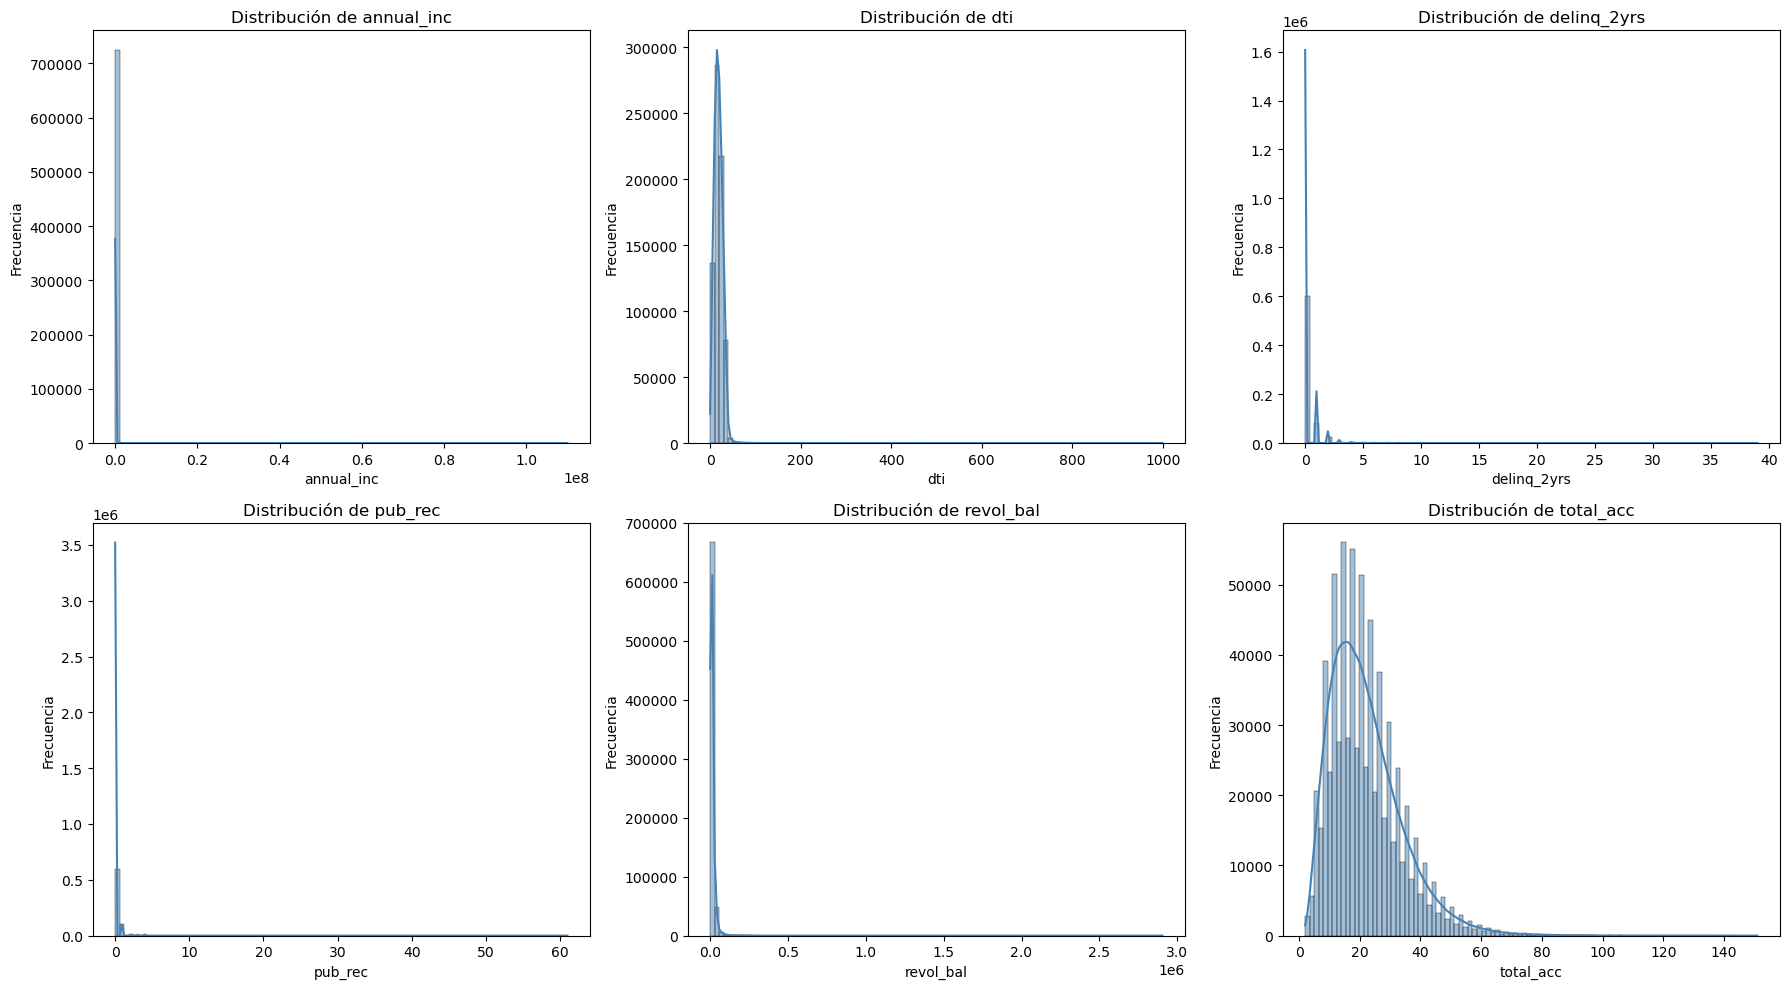

In [6]:
# Distribución de las variables numéricas para identificación de outliers
cols_dist = ['annual_inc', 'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'total_acc']
fig_dist, axes_dist = plt.subplots(2, 3, figsize=(18, 10))

for ax, col in zip(axes_dist.flat, cols_dist):
    sns.histplot(df[col], kde=True, ax=ax, bins=100, color='steelblue')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Conclusión:** Luego de dividir la data en train y test, se deberán de limpiar los outliers de train para realizar un buen entrenamiento, mientras que la data de test debe mantenerse caótica para que repreente correctamente la realidad.

In [7]:
# Mostrar información del DataFrame final
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724665 entries, 2265351 to 1371155
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       724665 non-null  float64
 1   term            724665 non-null  int64  
 2   int_rate        724665 non-null  float64
 3   home_ownership  724665 non-null  int64  
 4   annual_inc      724665 non-null  float64
 5   dti             724665 non-null  float64
 6   delinq_2yrs     724665 non-null  float64
 7   fico_range_low  724665 non-null  float64
 8   inq_last_6mths  724665 non-null  float64
 9   pub_rec         724665 non-null  float64
 10  revol_bal       724665 non-null  float64
 11  revol_util      724665 non-null  float64
 12  total_acc       724665 non-null  float64
 13  is_default      724665 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 82.9 MB


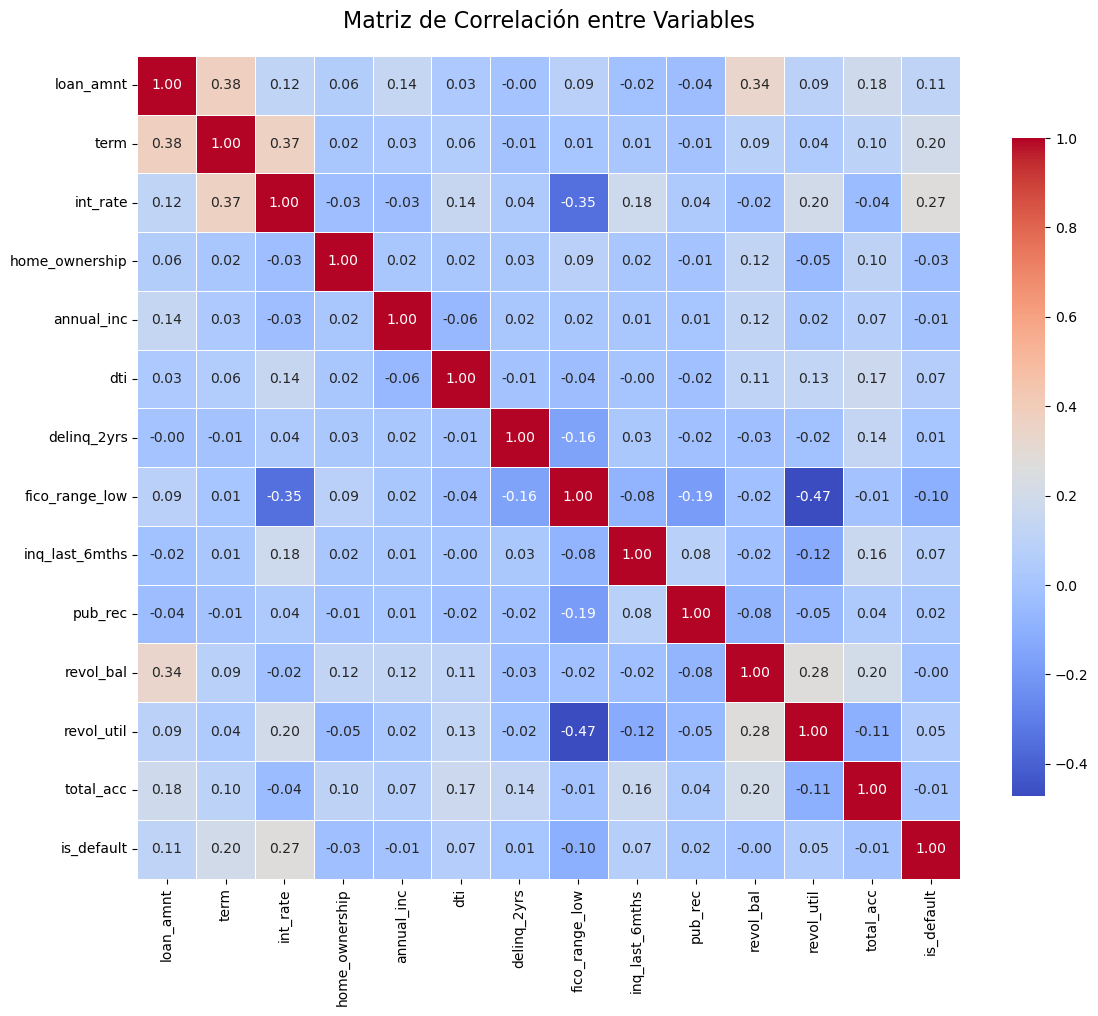

In [8]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear la figura
plt.figure(figsize=(12, 10))

# Generar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación entre Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

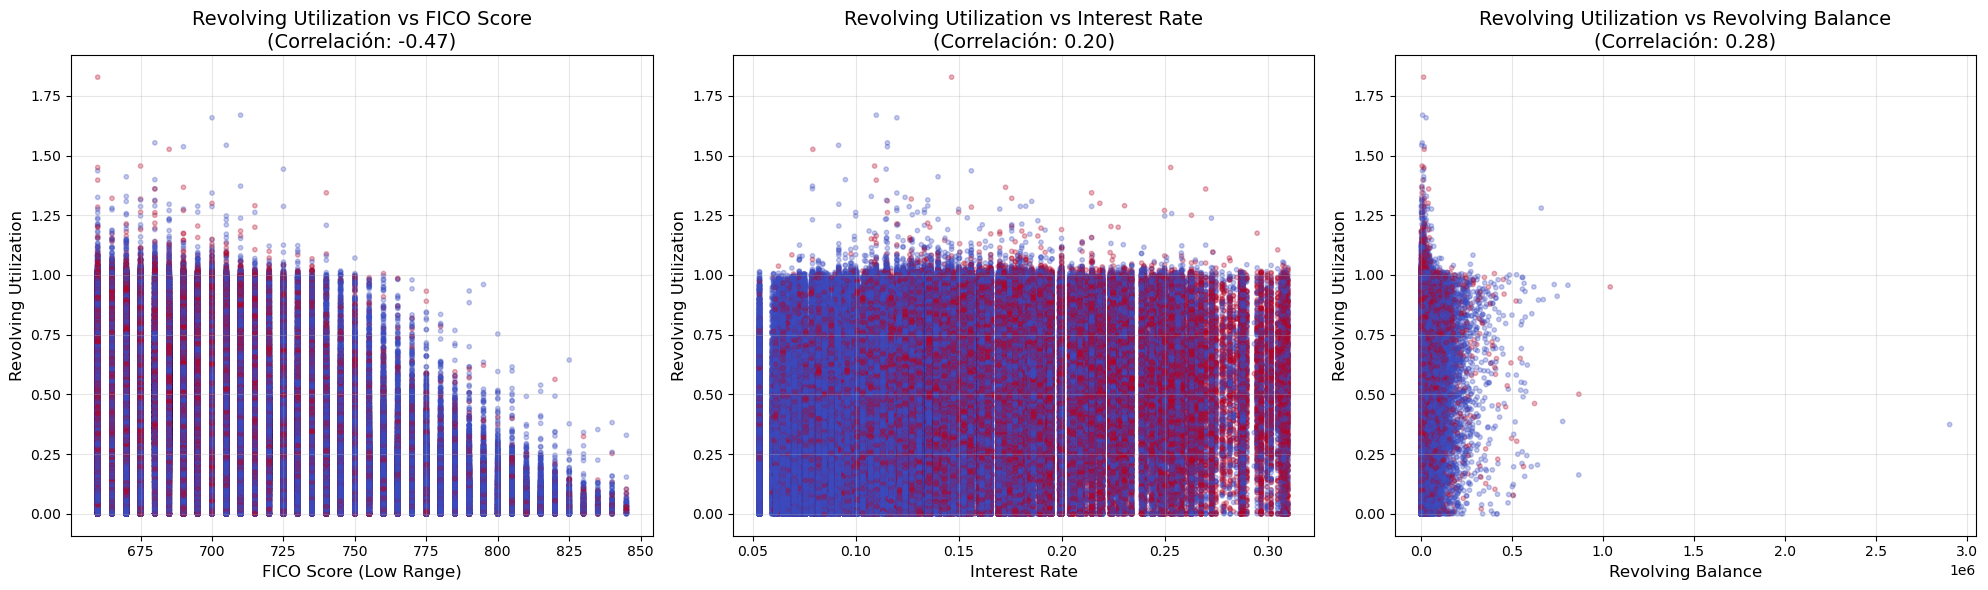


Estadísticas de revol_util y variables relacionadas:
          revol_util  fico_range_low       int_rate     revol_bal
count  724665.000000   724665.000000  724665.000000  7.246650e+05
mean        0.476847      695.260203       0.133477  1.297373e+04
std         0.248938       31.707217       0.049411  1.685677e+04
min         0.000000      660.000000       0.053100  0.000000e+00
25%         0.285000      670.000000       0.099200  4.873000e+03
50%         0.468000      685.000000       0.126900  9.180000e+03
75%         0.664000      710.000000       0.160200  1.604800e+04
max         1.828000      845.000000       0.309900  2.904836e+06

Correlaciones de revol_util:
revol_util vs fico_range_low: -0.4726
revol_util vs int_rate: 0.1954
revol_util vs revol_bal: 0.2750


In [9]:
# Análisis de correlaciones altas de revol_util con int_rate, fico_range_low y revol_bal

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: revol_util vs fico_range_low (correlación: -0.47)
axes[0].scatter(df['fico_range_low'], df['revol_util'], 
                alpha=0.3, s=10, c=df['is_default'], cmap='coolwarm')
axes[0].set_xlabel('FICO Score (Low Range)', fontsize=12)
axes[0].set_ylabel('Revolving Utilization', fontsize=12)
axes[0].set_title('Revolving Utilization vs FICO Score\n(Correlación: -0.47)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: revol_util vs int_rate (correlación: 0.20)
axes[1].scatter(df['int_rate'], df['revol_util'], 
                alpha=0.3, s=10, c=df['is_default'], cmap='coolwarm')
axes[1].set_xlabel('Interest Rate', fontsize=12)
axes[1].set_ylabel('Revolving Utilization', fontsize=12)
axes[1].set_title('Revolving Utilization vs Interest Rate\n(Correlación: 0.20)', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Gráfico 3: revol_util vs revol_bal (correlación: 0.28)
axes[2].scatter(df['revol_bal'], df['revol_util'], 
                alpha=0.3, s=10, c=df['is_default'], cmap='coolwarm')
axes[2].set_xlabel('Revolving Balance', fontsize=12)
axes[2].set_ylabel('Revolving Utilization', fontsize=12)
axes[2].set_title('Revolving Utilization vs Revolving Balance\n(Correlación: 0.28)', fontsize=14)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas de estas variables
print("\nEstadísticas de revol_util y variables relacionadas:")
print(df[['revol_util', 'fico_range_low', 'int_rate', 'revol_bal']].describe())

# Mostrar correlaciones específicas
print("\nCorrelaciones de revol_util:")
print(f"revol_util vs fico_range_low: {df['revol_util'].corr(df['fico_range_low']):.4f}")
print(f"revol_util vs int_rate: {df['revol_util'].corr(df['int_rate']):.4f}")
print(f"revol_util vs revol_bal: {df['revol_util'].corr(df['revol_bal']):.4f}")

**Conclusión de Data Analisis:** Aunque la variable revol_util tenga una correlación alta con variables predictoras como fico_range_low y revol_bal, agrega mayor información a la predicción al mostrar si el cliente se ha sobreendeudado respecto a su revol_bal.

In [10]:
# Exportamos el dataset a un dataframe limpio
df.to_csv('data/cleaned_lending_club_2015_2019.csv', index=False)